In [1]:
%matplotlib inline

In [2]:
import pandas 

import matplotlib.pyplot as plt 

from sklearn import pipeline, preprocessing, feature_selection, linear_model, model_selection, svm, metrics, neural_network

In [3]:
df = pandas.read_excel('../data_sets/family_1_in_freezer/GH1_data_JS.xlsx', sheetname=0, index_col='gene')

In [4]:
df.head()

,Sorting,Organism,PDB,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,pH7_80_pre80,pH7_90_pre90,Name,Sequence
gene,,,,,,,,,,,,,,,,
SDJGI_31,1,Picrophilus torridus DSM 9790,NaN,Archaea,0.010014,0.0,0.0,0.043767,0.042467,0.042100,0.040767,0.041400,0.04085,0.041333,SDJGI_31,MLPKNFLLGFSLAGFQSEMGISDPDSNSDWWLWVHDPVNIRTGLVS...
SDJGI_139,2,Thermoplasma volcanium GSS1,NaN,Archaea,0.399383,1.0,1.0,1.111767,1.494767,1.898033,1.949733,1.498800,2.11665,0.045933,SDJGI_139,MVENNFPEDFKFGWSQSGFQSEMGYDNAMDDKSDWYVWVHDKENIQ...
SDJGI_35,3,Magnaporthe grisea Y34,NaN,Eukaryote,0.012451,0.0,0.0,0.040667,0.040733,0.040500,0.040533,0.042033,0.04080,0.041333,SDJGI_35,MSLPKDFLWGFATASYQIEGAIDKDGRGPSIWDTFTAIPGKVADGS...
SDJGI_137,4,Thermococcus kodakarensis KOD1,NaN,Archaea,0.004728,0.0,0.0,0.041167,0.041233,0.040867,0.041000,0.042533,0.04190,0.042100,SDJGI_137,MREFAWGVVQSAFQFEMGDPLRRFIDTRTDWWHWVRDPLNIKNDLV...
SDJGI_42,5,Saccharophagus degradans 2-40,NaN,Bacteria,0.281507,1.0,0.0,1.795000,0.701667,1.006167,1.276900,0.511700,0.04050,0.041500,SDJGI_42,MNRLTLPPSSRLRSKEFTFGVATSSYQIEGGIDSRLPCNWDTFCEQ...


In [5]:
from Bio import SeqIO

name_dict = {}
for n, r in enumerate(SeqIO.parse('../full_auto/targets.fa', 'fasta'), 1):
    pkg = {n: r.name}
    name_dict.update(pkg)
    
f = pandas.read_hdf('../full_auto/data.h5')
f['label'] = f.index.map(lambda x: name_dict[x])
f.index = f['label']

J = df.join(f)

In [6]:
J.corr()

,Sorting,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,pH7_80_pre80,...,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,cart_bonded,total
Sorting,1.000000,0.096334,-0.097412,0.028381,-0.151705,-0.050234,-0.010718,-0.019595,0.030692,0.071331,...,-0.066150,NaN,-0.028635,0.030632,-0.098275,0.147993,0.043801,0.069497,0.123505,0.036953
Sol_exp_(mg/ml),0.096334,1.000000,0.312746,0.117099,0.388511,0.377130,0.322568,0.303914,0.304693,0.146893,...,-0.005409,NaN,-0.021932,0.043936,0.015826,0.138347,-0.038090,-0.098720,-0.048534,-0.058876
Cellobiose_binary(Act),-0.097412,0.312746,1.000000,0.433069,0.779229,0.779750,0.740887,0.658782,0.584610,0.411084,...,0.029446,NaN,-0.072619,-0.049286,0.044393,-0.076457,-0.025112,-0.084264,-0.114168,-0.077528
Cellobiose_therm_binary,0.028381,0.117099,0.433069,1.000000,0.210102,0.437225,0.580482,0.750201,0.779931,0.946837,...,-0.002127,NaN,-0.093902,-0.029117,-0.059734,-0.003111,-0.019132,-0.055238,-0.077201,-0.065348
pH7_40,-0.151705,0.388511,0.779229,0.210102,1.000000,0.859360,0.729999,0.666233,0.557360,0.230690,...,0.046986,NaN,-0.058804,0.038689,0.042394,-0.081764,-0.163226,-0.093960,-0.056743,-0.070075
pH4_40,-0.050234,0.377130,0.779750,0.437225,0.859360,1.000000,0.841235,0.786539,0.755642,0.486347,...,0.031724,NaN,-0.123984,0.040842,-0.028634,-0.059391,-0.153078,-0.128485,-0.094923,-0.120614
pH7_60,-0.010718,0.322568,0.740887,0.580482,0.729999,0.841235,1.000000,0.884568,0.798242,0.632566,...,0.035909,NaN,-0.114811,0.022254,-0.006459,-0.072434,-0.150524,-0.091782,-0.063067,-0.078342
pH7_80,-0.019595,0.303914,0.658782,0.750201,0.666233,0.786539,0.884568,1.000000,0.904507,0.785669,...,0.051587,NaN,-0.109919,0.041261,-0.006639,-0.057329,-0.164142,-0.079921,-0.060040,-0.069094
pH4_80,0.030692,0.304693,0.584610,0.779931,0.557360,0.755642,0.798242,0.904507,1.000000,0.843103,...,0.038940,NaN,-0.104071,0.015599,-0.002723,-0.094219,-0.088947,-0.090434,-0.089762,-0.086643
pH7_80_pre80,0.071331,0.146893,0.411084,0.946837,0.230690,0.486347,0.632566,0.785669,0.843103,1.000000,...,0.031422,NaN,-0.094842,-0.007311,-0.051291,-0.050124,-0.027871,-0.045556,-0.071003,-0.059203


In [7]:
J

,Sorting,Organism,PDB,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,...,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,cart_bonded,total
gene,,,,,,,,,,,,,,,,,,,,,
SDJGI_31,1,Picrophilus torridus DSM 9790,NaN,Archaea,0.010014,0.0,0.0,0.043767,0.042467,0.042100,...,-65.5747,0.0,85.1207,701.326,-87.7744,0.44668,90.2869,-17.28140,1802.79,879.52900
SDJGI_139,2,Thermoplasma volcanium GSS1,NaN,Archaea,0.399383,1.0,1.0,1.111767,1.494767,1.898033,...,-83.2669,0.0,45.3036,659.524,-103.6100,0.40117,80.9696,-58.77800,1363.27,237.94800
SDJGI_35,3,Magnaporthe grisea Y34,NaN,Eukaryote,0.012451,0.0,0.0,0.040667,0.040733,0.040500,...,-87.6809,0.0,44.8486,694.889,-95.7073,0.82135,91.2413,-55.28910,1508.30,384.42400
SDJGI_137,4,Thermococcus kodakarensis KOD1,NaN,Archaea,0.004728,0.0,0.0,0.041167,0.041233,0.040867,...,-70.6969,0.0,51.7299,585.415,-65.4842,0.40656,154.8890,-39.51310,1208.08,286.44800
SDJGI_42,5,Saccharophagus degradans 2-40,NaN,Bacteria,0.281507,1.0,0.0,1.795000,0.701667,1.006167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SDJGI_34,6,Methylococcus capsulatus str. Bath,NaN,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,...,-78.5438,0.0,59.3998,655.748,-98.0092,0.83117,103.6350,-58.19480,1397.64,345.59100
SDJGI_33,7,Bacillus licheniformis ATCC 14580 / DSM13,NaN,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,...,-67.5508,0.0,93.2625,669.776,-92.4422,0.73508,113.8010,-19.87500,1476.98,496.38400
SDJGI_83,8,Anoxybacillus flavithermus WK1,NaN,Bacteria,0.199315,1.0,0.0,1.912067,1.897867,1.838567,...,-73.1038,0.0,63.4111,625.173,-103.7950,0.29825,131.6510,-63.32680,1354.07,245.60700
SDJGI_136,9,Hypocrea jecorina QM9414,NaN,Eukaryote,0.075525,1.0,0.0,0.316567,0.199267,0.283700,...,-50.1192,0.0,64.4333,684.807,-75.0161,0.37342,139.8870,-15.57350,1701.91,2215.91000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a48af60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e6d4198>]], dtype=object)

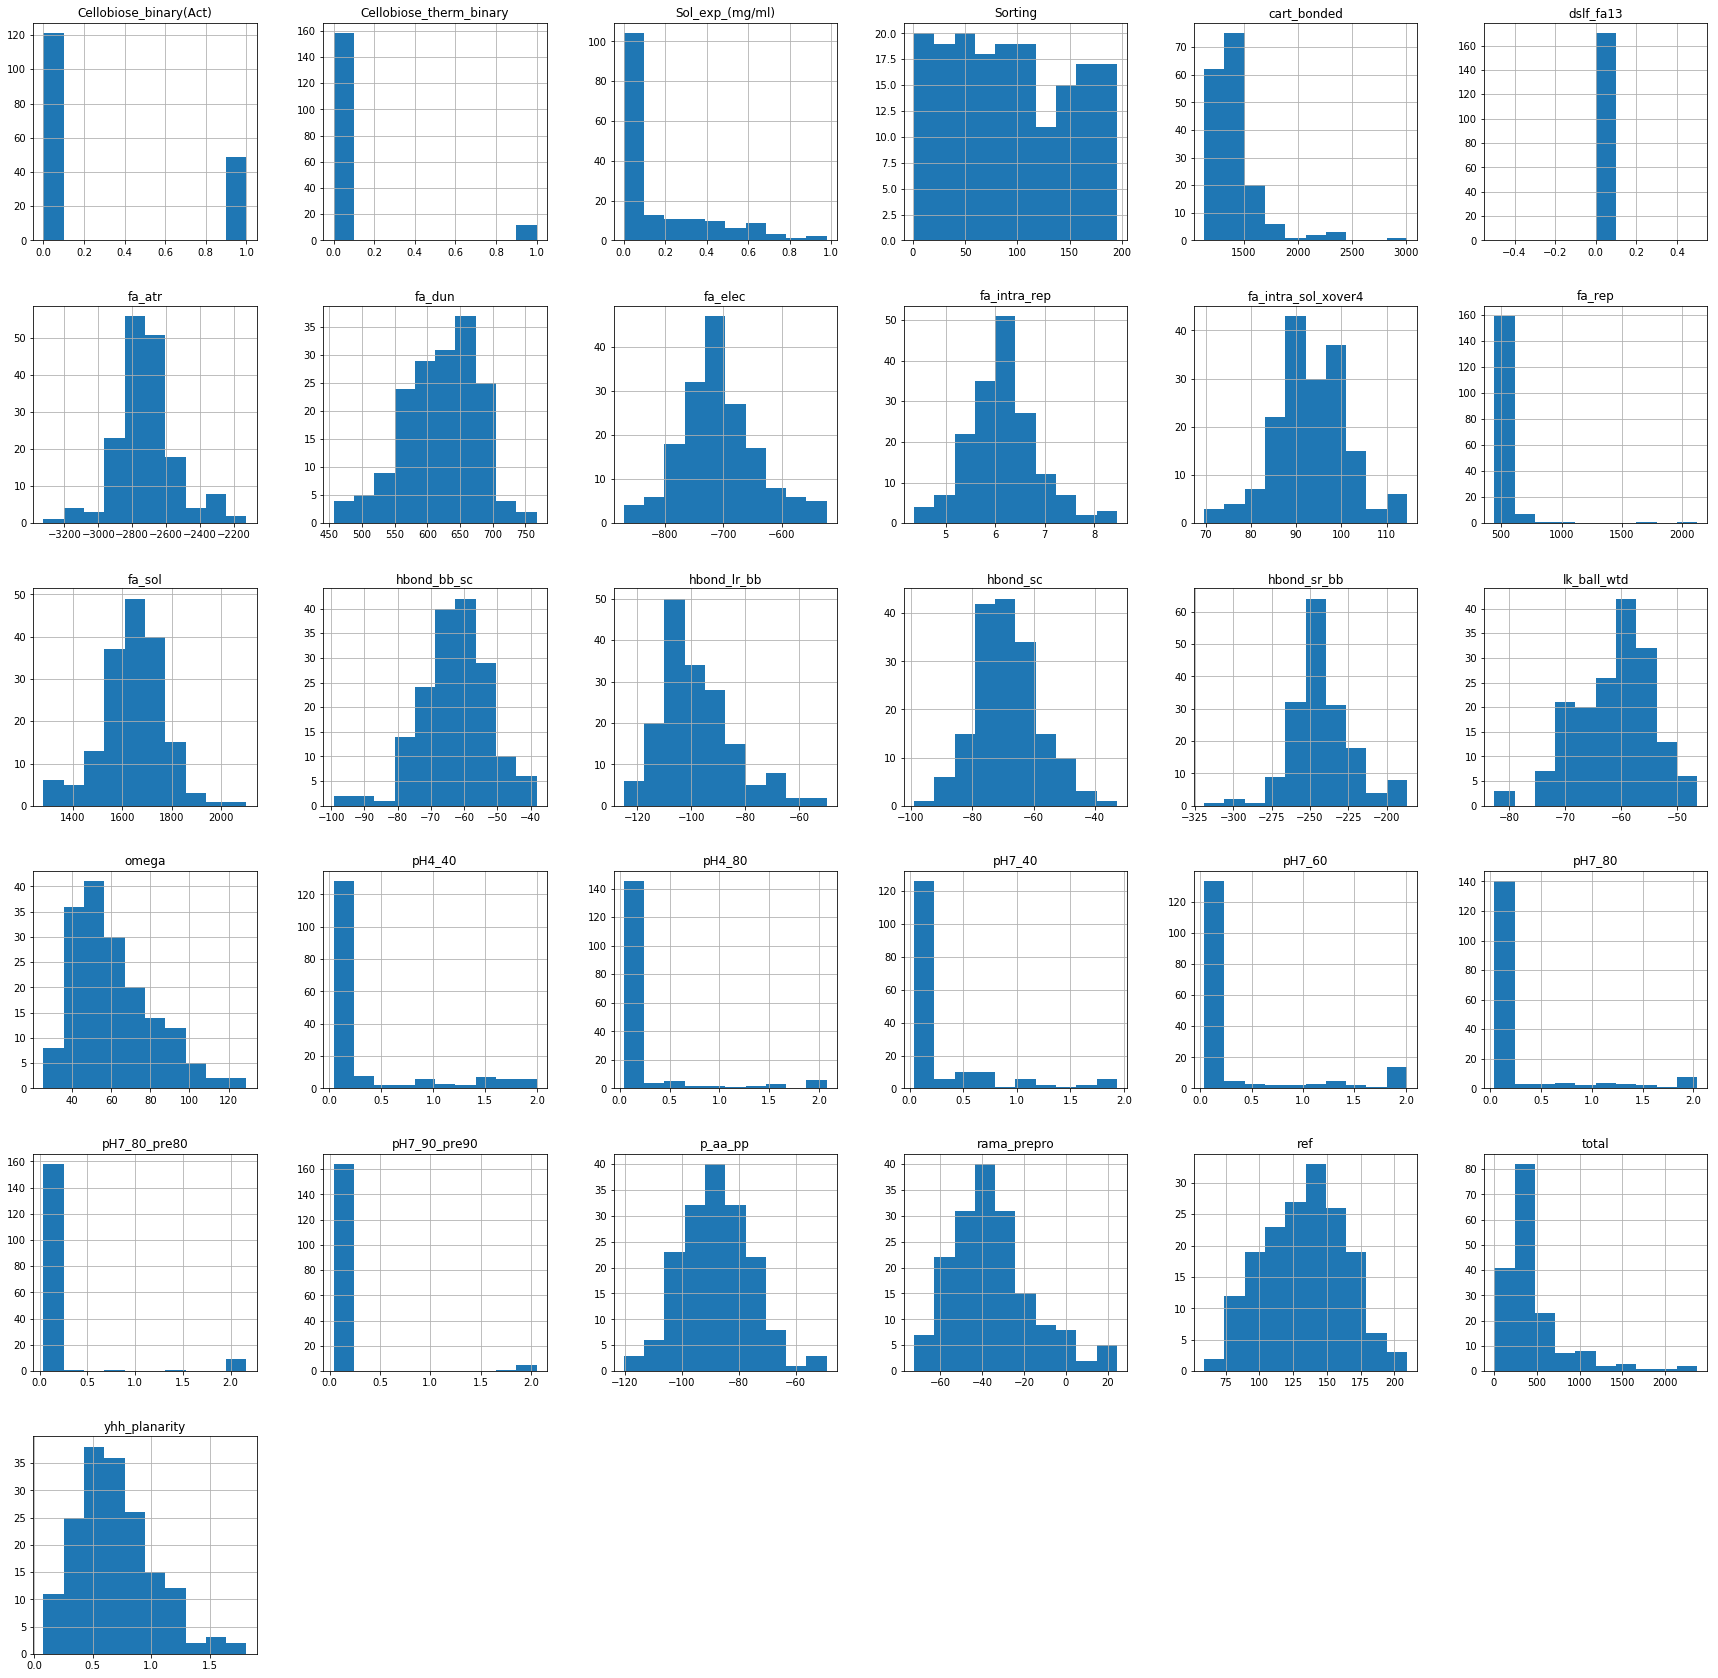

In [8]:
J.hist(figsize=(30,30))

In [9]:
J.head()

,Sorting,Organism,PDB,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,...,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,cart_bonded,total
gene,,,,,,,,,,,,,,,,,,,,,
SDJGI_31,1,Picrophilus torridus DSM 9790,NaN,Archaea,0.010014,0.0,0.0,0.043767,0.042467,0.042100,...,-65.5747,0.0,85.1207,701.326,-87.7744,0.44668,90.2869,-17.2814,1802.79,879.529
SDJGI_139,2,Thermoplasma volcanium GSS1,NaN,Archaea,0.399383,1.0,1.0,1.111767,1.494767,1.898033,...,-83.2669,0.0,45.3036,659.524,-103.6100,0.40117,80.9696,-58.7780,1363.27,237.948
SDJGI_35,3,Magnaporthe grisea Y34,NaN,Eukaryote,0.012451,0.0,0.0,0.040667,0.040733,0.040500,...,-87.6809,0.0,44.8486,694.889,-95.7073,0.82135,91.2413,-55.2891,1508.30,384.424
SDJGI_137,4,Thermococcus kodakarensis KOD1,NaN,Archaea,0.004728,0.0,0.0,0.041167,0.041233,0.040867,...,-70.6969,0.0,51.7299,585.415,-65.4842,0.40656,154.8890,-39.5131,1208.08,286.448
SDJGI_42,5,Saccharophagus degradans 2-40,NaN,Bacteria,0.281507,1.0,0.0,1.795000,0.701667,1.006167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
J.describe()

,Sorting,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,pH7_80_pre80,...,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,cart_bonded,total
count,175.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,93.234286,0.168167,0.288235,0.070588,0.272560,0.321060,0.320753,0.253367,0.211842,0.164012,...,-68.559590,0.0,61.334004,620.719406,-87.832549,0.693774,133.100718,-34.886995,1415.780235,452.998457
std,57.041596,0.229040,0.454279,0.256892,0.463394,0.561389,0.592416,0.506774,0.452275,0.468312,...,10.581965,0.0,20.206065,58.257959,12.421269,0.328740,30.184179,19.456320,238.231977,375.898022
min,1.000000,0.000614,0.000000,0.000000,0.039633,0.039833,0.039133,0.039767,0.040000,0.039700,...,-99.010300,0.0,25.469900,456.455000,-120.420000,0.079030,59.043200,-72.570800,1132.030000,3.595120
25%,44.500000,0.007218,0.000000,0.000000,0.040467,0.040700,0.040333,0.040333,0.041408,0.040350,...,-76.261575,0.0,45.623925,582.179000,-95.906150,0.453733,109.153000,-47.937750,1282.195000,246.002250
50%,89.000000,0.034451,0.000000,0.000000,0.041267,0.041700,0.041300,0.040750,0.043150,0.040700,...,-69.366600,0.0,56.626150,625.220500,-87.796650,0.649495,134.992000,-38.605600,1358.905000,342.153000
75%,146.500000,0.289805,1.000000,0.000000,0.314075,0.184350,0.081392,0.054917,0.058750,0.042125,...,-62.246750,0.0,74.614450,660.943750,-79.886125,0.865533,155.250250,-25.375750,1450.407500,495.278500
max,195.000000,0.978237,1.000000,1.000000,1.933167,1.992800,2.012100,2.036767,2.075467,2.163800,...,-32.822400,0.0,129.032000,767.231000,-49.143000,1.814640,209.275000,24.371900,3007.620000,2372.680000


In [17]:
template = '''
{index}\tring_height\t1\t{ring_height1}
{index}\tring_height\t2\t{ring_height2}
'''

header = '''
clade_marker_size\t0 
Q7MG41^ clade_marker_size\t10
Q7MG41^ clade_marker_color\t#000

'''

lines = []
for i, row in J.iterrows():
    
    pkg = { 
        'index': i, 
        'ring_height1': row['pH7_40'], 
        'ring_height2': row['total']/2500, 
    }
    
    ln = template.format(**pkg)
    
    if 'nan' not in ln and '_29' not in i:
        lines.append(ln)

with open( 'annot.txt', 'w') as fn:
    fn.write(header)
    fn.write(''.join(lines))

In [18]:
! head annot.txt


clade_marker_size	0 
Q7MG41^ clade_marker_size	10
Q7MG41^ clade_marker_color	#000


SDJGI_31	ring_height	1	0.04376666666666667
SDJGI_31	ring_height	2	0.3518116

SDJGI_139	ring_height	1	1.1117666666666666


In [19]:
! bash run.sh

Error: "Q7MG41^ clade_marker_size" is not a legal option
Exiting...



![](out.png)

In [78]:
# now that we can visualize as a tree, let's do some machine learning "machine learning" 

In [79]:
t = [4, 139, 142]
for tt in t:
    loc = 'SDJGI_{}'.format(tt)
    if loc in J.index:
#         print(J.loc[loc])
        print(loc, 'ring_color', 1, '#eeffff', sep='\t')

SDJGI_4	ring_color	1	#eeffff
SDJGI_139	ring_color	1	#eeffff
SDJGI_142	ring_color	1	#eeffff


In [80]:
J.columns

Index(['Sorting', 'Organism', 'PDB', 'Kindgom', 'Sol_exp_(mg/ml)',
       'Cellobiose_binary(Act)', 'Cellobiose_therm_binary', 'pH7_40', 'pH4_40',
       'pH7_60', 'pH7_80', 'pH4_80', 'pH7_80_pre80', 'pH7_90_pre90', 'Name',
       'Sequence', 'label', 'fa_atr', 'fa_rep', 'fa_sol', 'fa_intra_rep',
       'fa_intra_sol_xover4', 'lk_ball_wtd', 'fa_elec', 'hbond_sr_bb',
       'hbond_lr_bb', 'hbond_bb_sc', 'hbond_sc', 'dslf_fa13', 'omega',
       'fa_dun', 'p_aa_pp', 'yhh_planarity', 'ref', 'rama_prepro',
       'cart_bonded', 'total'],
      dtype='object')

In [81]:
features = [
    'fa_atr', 'fa_rep', 'fa_sol', 'fa_intra_rep',
    'fa_intra_sol_xover4', 'lk_ball_wtd', 'fa_elec', 'hbond_sr_bb',
    'hbond_lr_bb', 'hbond_bb_sc', 'hbond_sc', 'dslf_fa13', 'omega',
    'fa_dun', 'p_aa_pp', 'yhh_planarity', 'ref', 'rama_prepro',
    'cart_bonded', 'total'
]

target = 'Cellobiose_binary(Act)'

In [82]:
W = J[features+[target]].dropna()
X = W[features]
y = W[target].ravel()

X.shape, y.shape

((165, 20), (165,))

In [83]:
pln = pipeline.Pipeline([
    ('variance', feature_selection.VarianceThreshold()), 
    ('scaler', preprocessing.StandardScaler()), 
    #('linear_regression', linear_model.LinearRegression()),
    ('svm', svm.SVC(class_weight='balanced', C=1)), 
#     ('neural_net', neural_network.MLPClassifier()),
])

pred = model_selection.cross_val_predict(pln, X, y, cv=10)

In [84]:
metrics.confusion_matrix(y, pred)

array([[60, 57],
       [26, 22]])

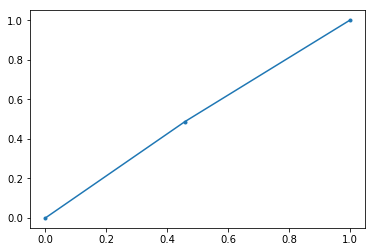

In [85]:
fpr, tpr, __ = metrics.roc_curve(y, pred)
plt.plot(tpr, fpr, marker='.')